In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate(x0, y0, r, noise = 0.0, num = 1000):
    # Generate points on a circle with center (x0, y0) and radius r
    # Add uniform noise to the radius if specified

    theta = np.linspace(0, 2 * np.pi, num = num)
    r = r + noise * (2 * np.random.rand(*theta.shape) - 1)

    x = r * np.cos(theta) + x0
    y = r * np.sin(theta) + y0
    return x, y

def taubin_circle_fit(x, y):
    # Fit a circle to (x, y) points using the Taubin method

    A = np.stack([x, y, np.ones_like(x)], axis = 1)
    b = x ** 2 + y ** 2
    out, _, _, _ = np.linalg.lstsq(A, b, rcond = None)

    x0 = out[0] / 2
    y0 = out[1] / 2
    r = np.sqrt(out[2] + x0 ** 2 + y0 ** 2)
    return x0, y0, r

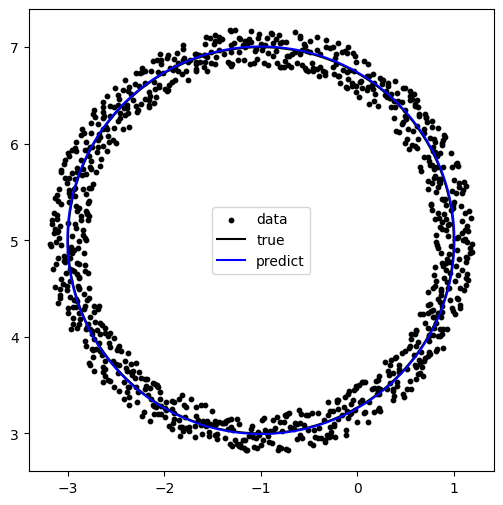

In [3]:
# Circle parameters
x0 = -1  # x-coordinate of the center
y0 = 5   # y-coordinate of the center
r = 2    # radius of the circle

# Generate noisy circle data
x, y = generate(x0, y0, r, 0.2, num = 1000)

# Generate true circle points for plotting
x_t, y_t = generate(x0, y0, r)

# Fit circle to the noisy data points
x_p, y_p = generate(*taubin_circle_fit(x, y))

# Plotting the results
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s = 10, color = 'k', label = 'data')
plt.plot(x_t, y_t, color = 'k', label = 'true')
plt.plot(x_p, y_p, color = 'b', label = 'predict')
plt.legend()
plt.show()